In [30]:
import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np 

from tools import * 
from my_functions_tp02 import * 

In [31]:
%matplotlib inline
# edit this line to change the figure size
plt.rcParams['figure.figsize'] = (16.0, 10.0)
# force auto-reload of import modules before running code 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
flower_img = cv2.imread('./images/flower.png')
gray_flower_img = cv2.cvtColor(flower_img, cv2.COLOR_BGR2GRAY)

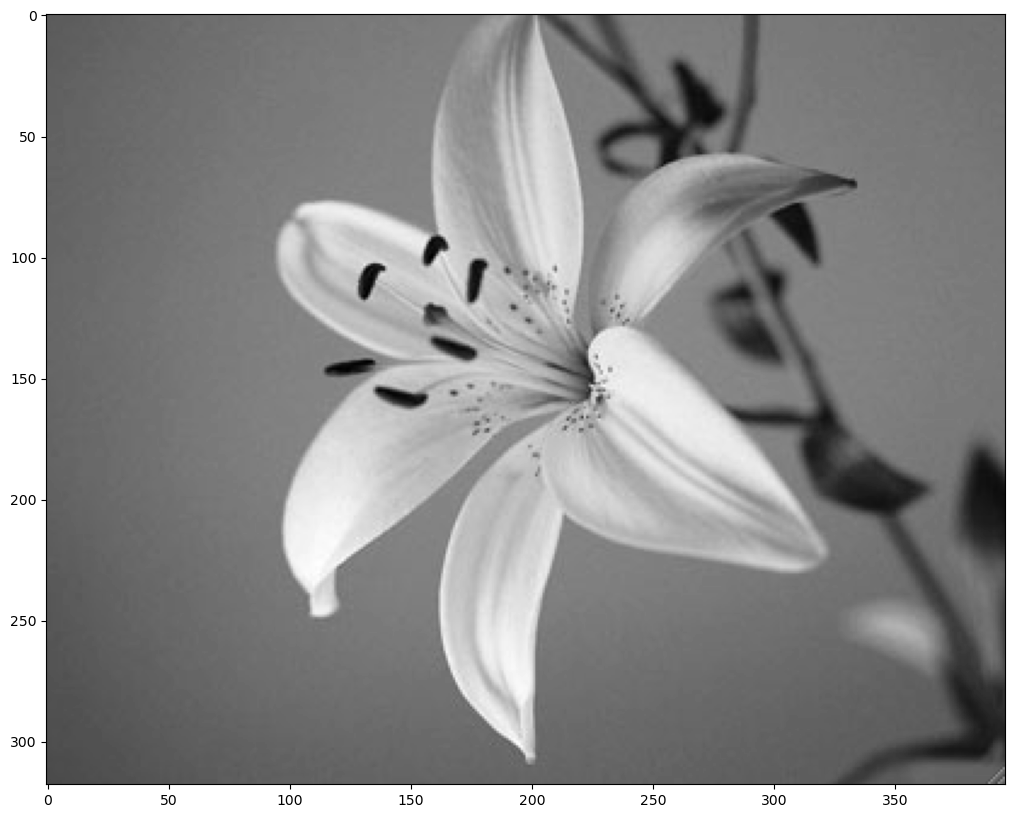

In [33]:
plt.imshow(gray_flower_img, cmap='gray')
plt.show()

MEAN FILTER

In [34]:
# Create the kernel of a 3, 7, 10 2d Mean filter 

mean_kernel3x3 = get_mean_filter(3)
mean_kernel7x7 = get_mean_filter(7)
mean_kernel11x11 = get_mean_filter(11)

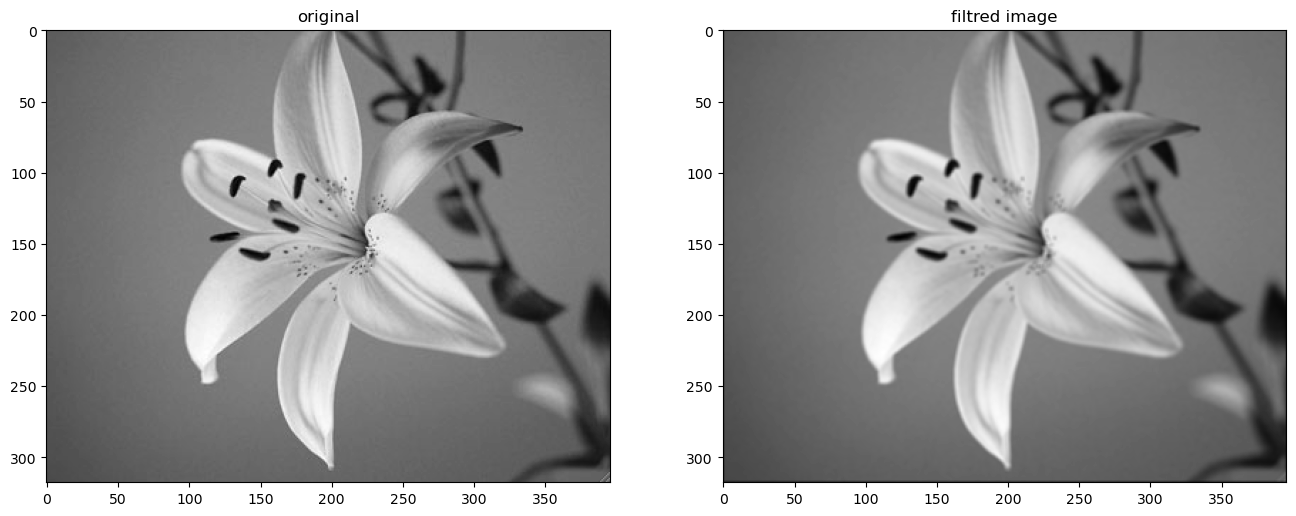

In [35]:
# Mean Filter ( 3x3 Kernel)
filter_analysis(gray_flower_img, mean_kernel3x3, cmap='gray')

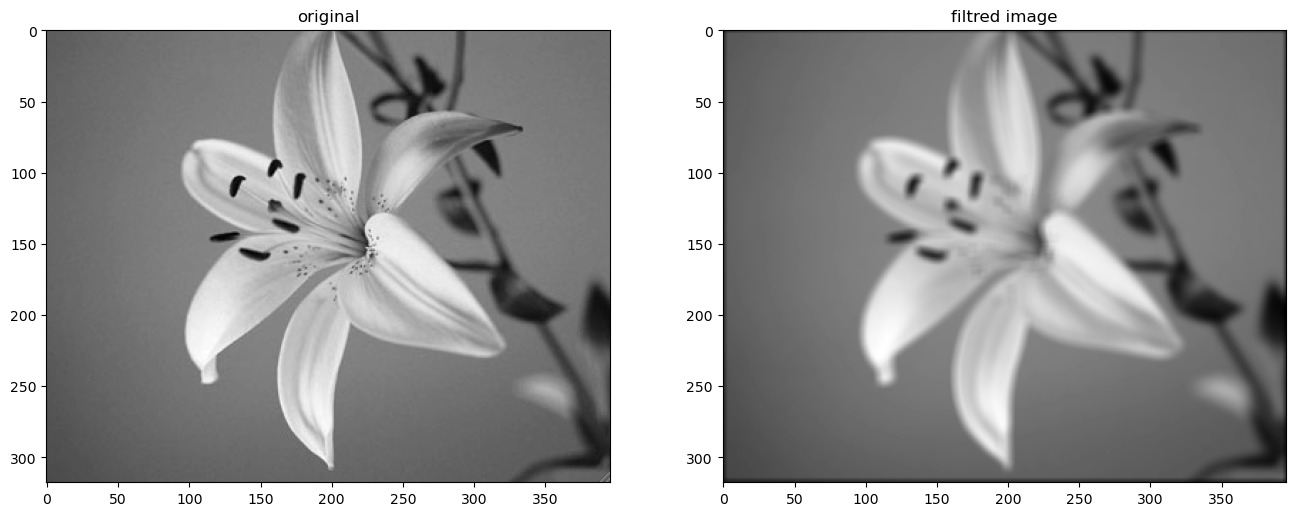

In [36]:
# Mean Filter ( 7x7 Kernel)
filter_analysis(gray_flower_img, mean_kernel7x7, cmap='gray')

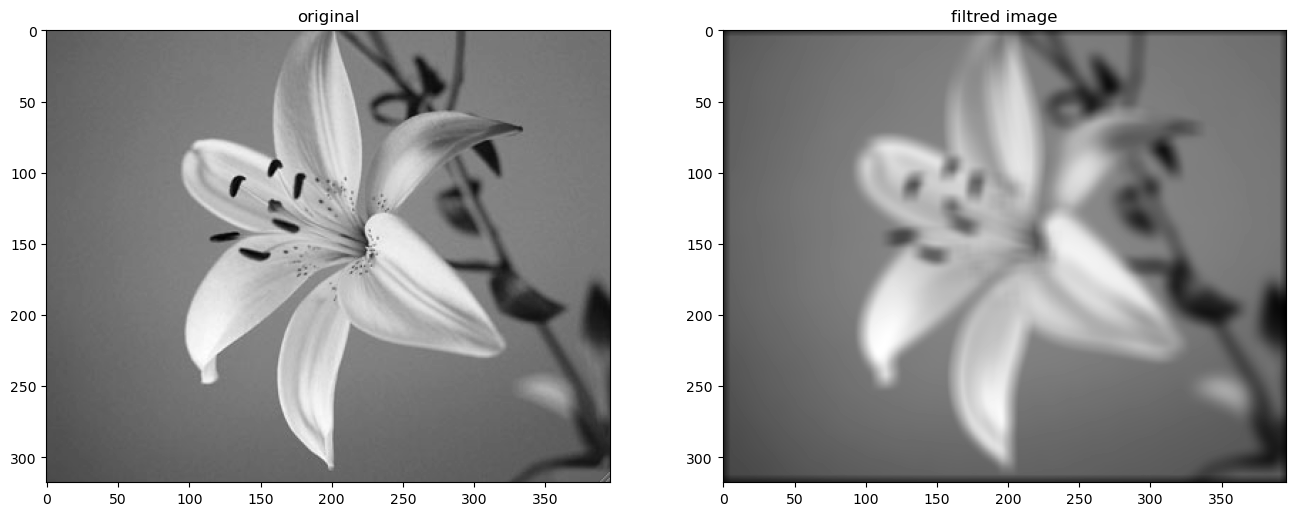

In [37]:
# Mean Filter ( 11x11 Kernel)
filter_analysis(gray_flower_img, mean_kernel11x11, cmap='gray')

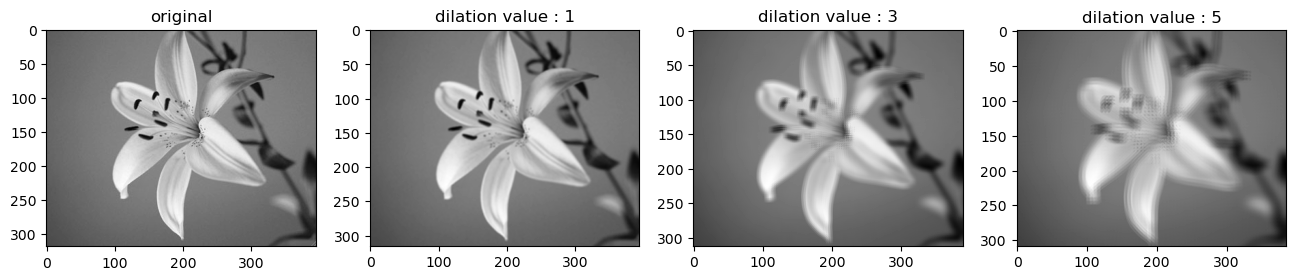

In [38]:
dilations = [ 1, 3, 5]

fig,ax = plt.subplots(1,4)
#     ploting original img
ax[0].imshow(gray_flower_img, cmap='gray')
ax[0].set_title("original")

i = 1
for dilation in dilations : 
    dilation_img = tools.Conv2D(gray_flower_img, mean_kernel3x3, padding=(0,0) , dilation=(dilation,dilation))
    
    #     ploting filtred img
    ax[i].imshow(dilation_img, cmap='gray')
    ax[i].set_title('dilation value : '+ str(dilation))
    i = i + 1
    

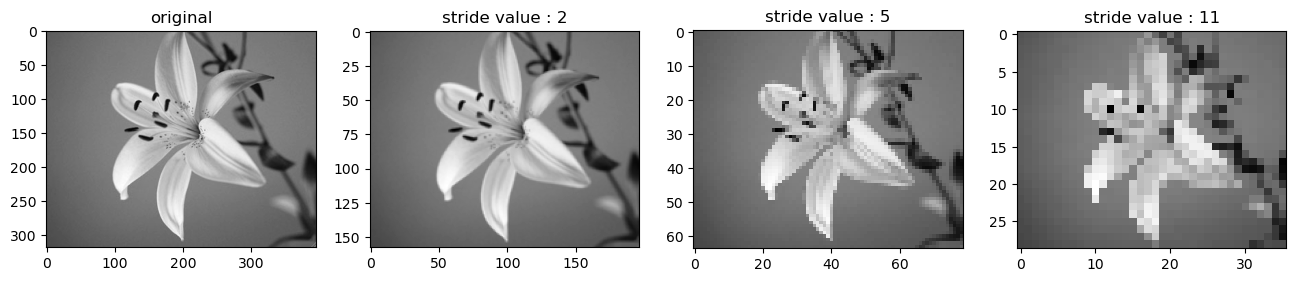

In [39]:
strides = [ 2, 5, 11]

fig,ax = plt.subplots(1,4)
#     ploting original img
ax[0].imshow(gray_flower_img, cmap='gray')
ax[0].set_title("original")

i = 1
for stride in strides : 
    filtered_with_stride_img = tools.Conv2D(gray_flower_img, mean_kernel3x3, padding=(0,0) , stride=(stride,stride))
    
    #     ploting filtred img
    ax[i].imshow(filtered_with_stride_img, cmap='gray')
    ax[i].set_title('stride value : '+ str(stride))
    i = i + 1
    

Text(0.5, 1.0, 'dilation image')

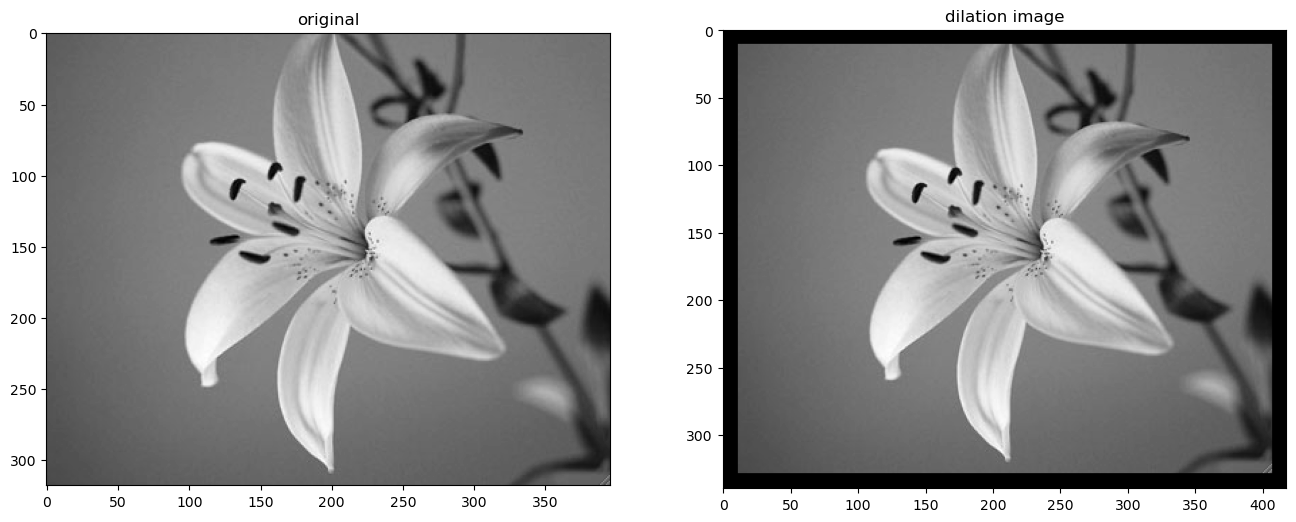

In [40]:
gray_flower_img_with_padding = tools.add_padding(gray_flower_img, padding=(11, 11))

fig,ax = plt.subplots(1,2)
#     ploting original img
ax[0].imshow(gray_flower_img, cmap='gray')
ax[0].set_title("original")
#     ploting filtred img
ax[1].imshow(gray_flower_img_with_padding, cmap='gray')
ax[1].set_title('dilation image')

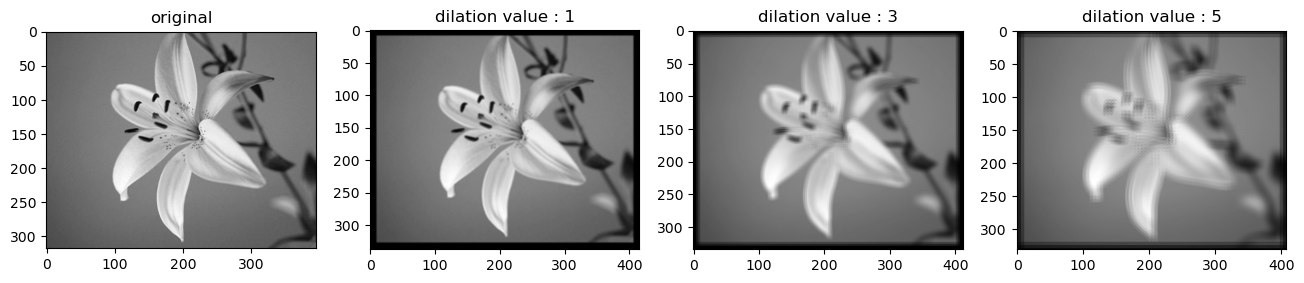

In [41]:
dilations = [ 1, 3, 5]

fig,ax = plt.subplots(1,4)
#     ploting original img
ax[0].imshow(gray_flower_img, cmap='gray')
ax[0].set_title("original")

i = 1
for dilation in dilations : 
    dilation_img = tools.Conv2D(gray_flower_img_with_padding, mean_kernel3x3, padding=(0,0) , dilation=(dilation,dilation))
    
    #     ploting filtred img
    ax[i].imshow(dilation_img, cmap='gray')
    ax[i].set_title('dilation value : '+ str(dilation))
    i = i + 1
    

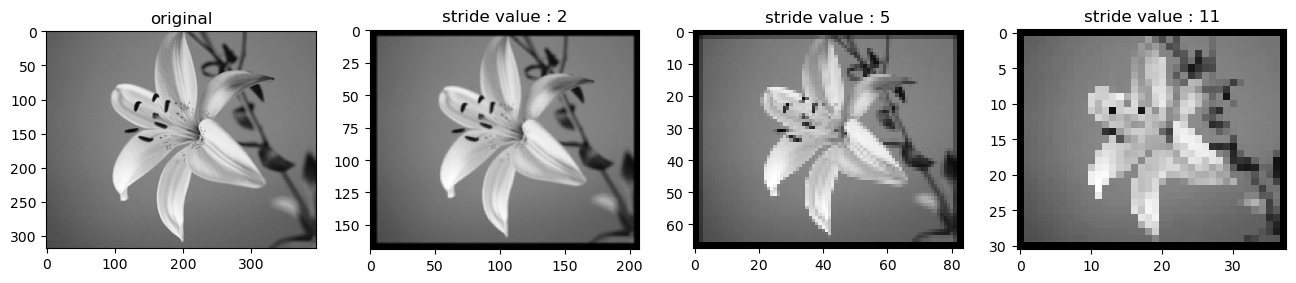

In [42]:
strides = [ 2, 5, 11]

fig,ax = plt.subplots(1,4)
#     ploting original img
ax[0].imshow(gray_flower_img, cmap='gray')
ax[0].set_title("original")

i = 1
for stride in strides : 
    filtered_with_stride_img = tools.Conv2D(gray_flower_img_with_padding, mean_kernel3x3, padding=(0,0) , stride=(stride,stride))
    
    #     ploting filtred img
    ax[i].imshow(filtered_with_stride_img, cmap='gray')
    ax[i].set_title('stride value : '+ str(stride))
    i = i + 1
    

In [43]:
text_image = cv2.imread('./images/image.png')
text_image_img_grayscale = cv2.cvtColor(text_image, cv2.COLOR_BGR2GRAY)

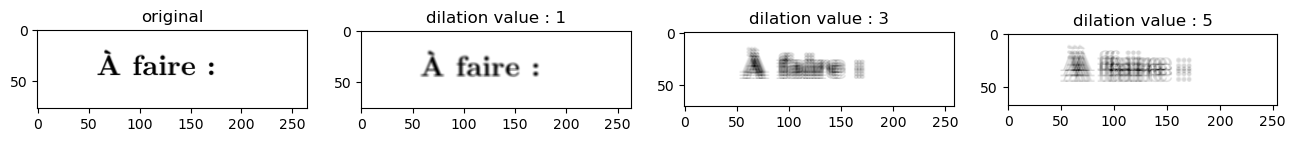

In [44]:
dilations = [ 1, 3, 5]

fig,ax = plt.subplots(1,4)
#     ploting original img
ax[0].imshow(text_image_img_grayscale,  cmap='gray')
ax[0].set_title("original")

i = 1
for dilation in dilations : 
    dilation_img = tools.Conv2D(text_image_img_grayscale, mean_kernel3x3, padding=(0,0) , dilation=(dilation,dilation))
    
    #     ploting filtred img
    ax[i].imshow(dilation_img, cmap='gray')
    ax[i].set_title('dilation value : '+ str(dilation))
    i = i + 1
    

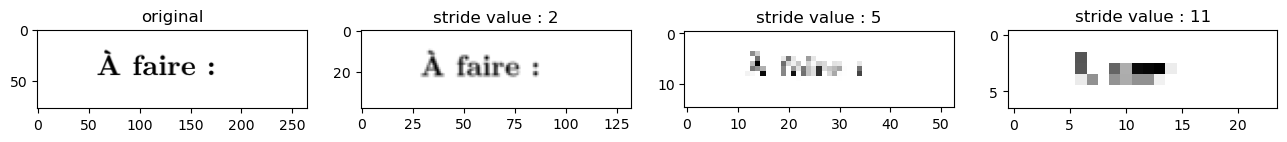

In [45]:
strides = [ 2, 5, 11]

fig,ax = plt.subplots(1,4)
#     ploting original img
ax[0].imshow(text_image_img_grayscale, cmap='gray')
ax[0].set_title("original")

i = 1
for stride in strides :
    filtered_with_stride_img = tools.Conv2D(text_image_img_grayscale, mean_kernel3x3, padding=(0,0) , stride=(stride,stride))
    
    #     ploting filtred img
    ax[i].imshow(filtered_with_stride_img, cmap='gray')
    ax[i].set_title('stride value : '+ str(stride))
    i = i + 1
    

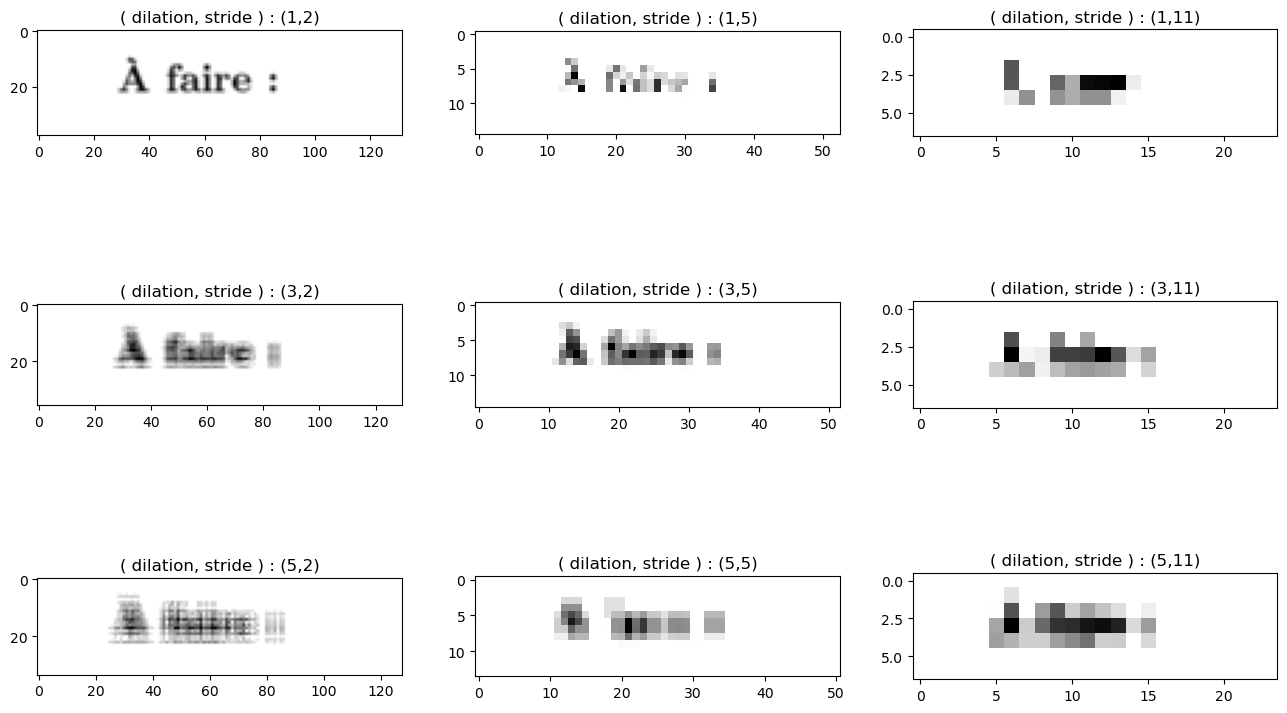

In [46]:
strides = [ 2, 5, 11]
dilations = [ 1, 3, 5]

fig,ax = plt.subplots(3, 3)

j = 0
for stride in strides :
    i = 0    
    for dilation in dilations : 
    
        filtered_img = tools.Conv2D(
            text_image_img_grayscale, 
            mean_kernel3x3, 
            padding=(0,0), 
            dilation=(dilation,dilation),
            stride=(stride, stride)
        )
            
        #     ploting filtred img
        ax[i][j].imshow(filtered_img, cmap='gray')
        ax[i][j].set_title('( dilation, stride ) : ('+ str(dilation)+','+str(stride)+')')
        i = i + 1
    j = j + 1    

***DISCRETE FILTERS AND CONTOURS DETECTION***

- **Edge Detection**: 
  - **Edge Detection**: Identifying points in an image where the intensity changes sharply.
  - **Gradient Method**: Detects edges using the maximum and minimum of the first derivative of the image.
  - **Laplacian Method**: Detects edges using zero-crossings of the second derivative of the image.

- **Sobel Filter**: 
  - **Sobel Filter**: A gradient-based filter used for edge detection in grayscale and color images.
  - **Convolution**: The process of adding each element of the image to its local neighbors, weighted by the kernel (Sx, Sy).

- **Laplacian Filter**: 
  - **Laplacian Filter**: A high-pass filter that enhances edges and details in an image.
  - **Second Spatial Derivative**: The sum of the second derivatives in the x and y directions, used to calculate pixel output values.

In [47]:
Gx = get_Gx(gray_flower_img)
Gy = get_Gy(gray_flower_img)

Text(0.5, 1.0, 'gradient y : ')

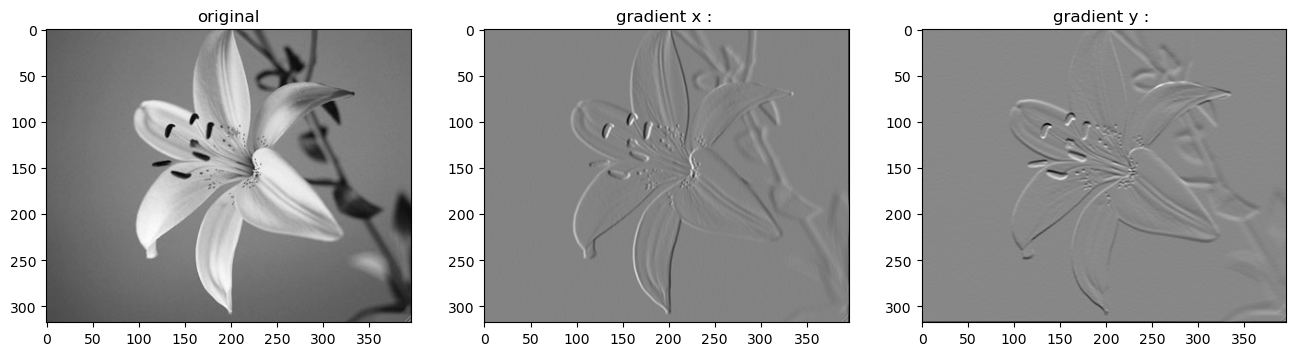

In [49]:
fig,ax = plt.subplots(1,3)

#     ploting original img
ax[0].imshow(gray_flower_img, cmap='gray')
ax[0].set_title("original")

ax[1].imshow(Gx, cmap='gray')
ax[1].set_title('gradient x : ')

ax[2].imshow(Gy, cmap= "gray")
ax[2].set_title('gradient y : ')

Text(0.5, 1.0, 'gradient direction : ')

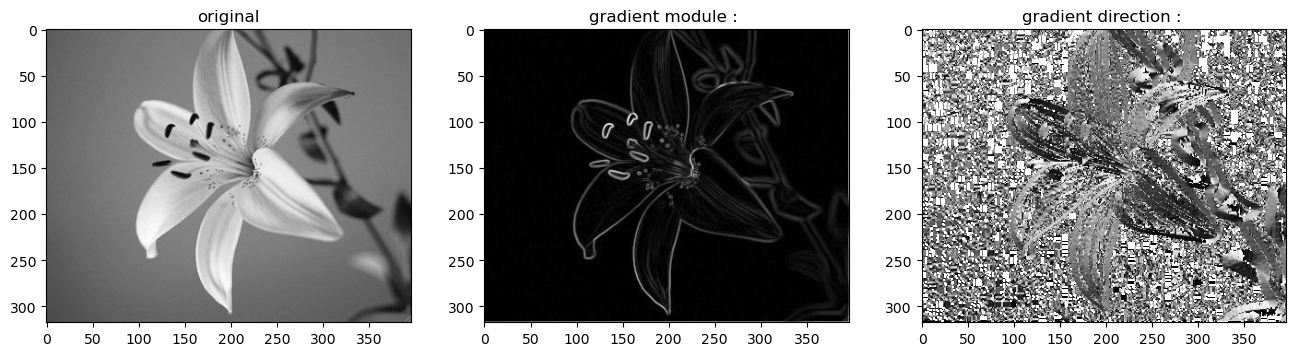

In [48]:
grad_module = module_grad(gray_flower_img)
grad_direct = direct_grad(gray_flower_img)

fig,ax = plt.subplots(1,3)

#     ploting original img
ax[0].imshow(gray_flower_img, cmap='gray')
ax[0].set_title("original")

ax[1].imshow(grad_module, cmap='gray')
ax[1].set_title('gradient module : ')

ax[2].imshow(grad_direct, cmap= "gray")
ax[2].set_title('gradient direction : ')        

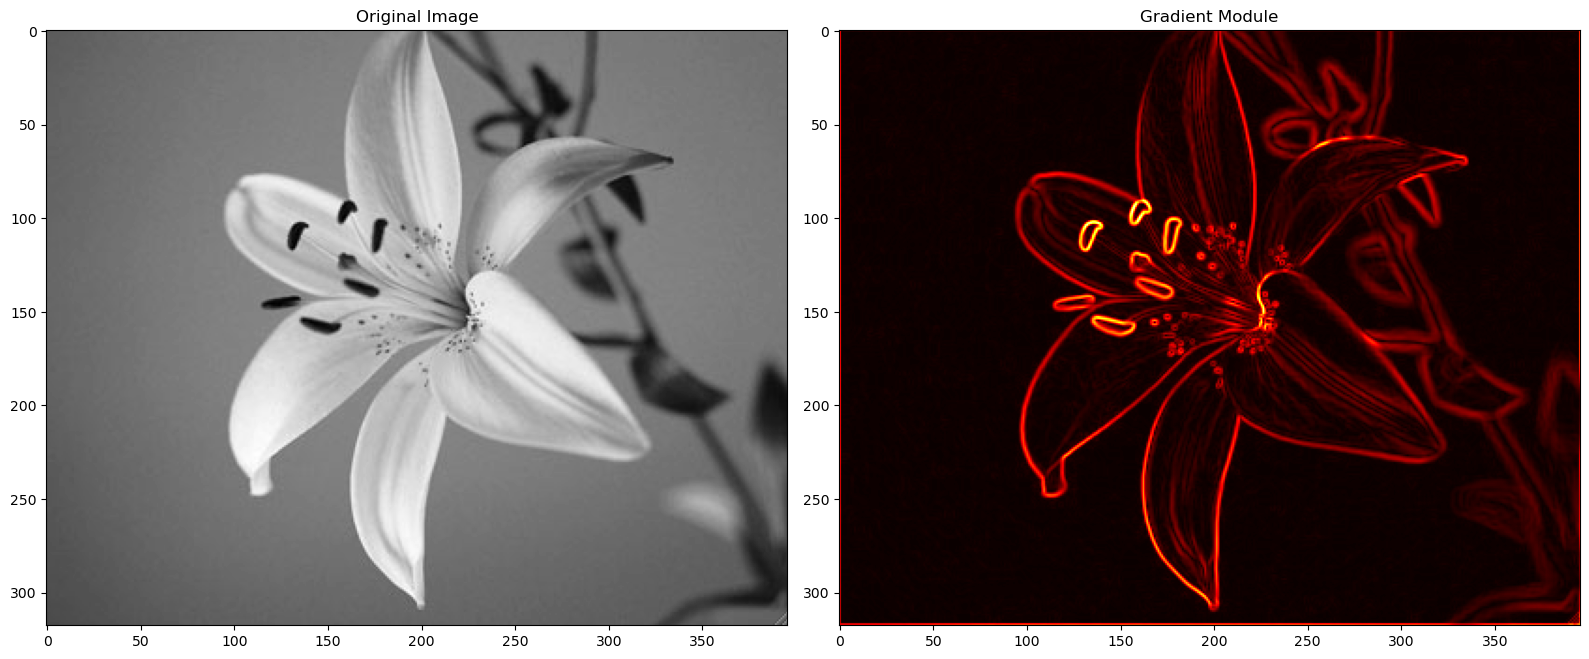

In [69]:
# Plotting the original image
plt.subplot(1, 2, 1)
plt.imshow(gray_flower_img, cmap='gray')
plt.title('Original Image')

# Plotting the gradient module
plt.subplot(1, 2, 2)
plt.imshow(grad_module, cmap='hot')
plt.title('Gradient Module')

# Displaying the plot
plt.tight_layout()
plt.show()


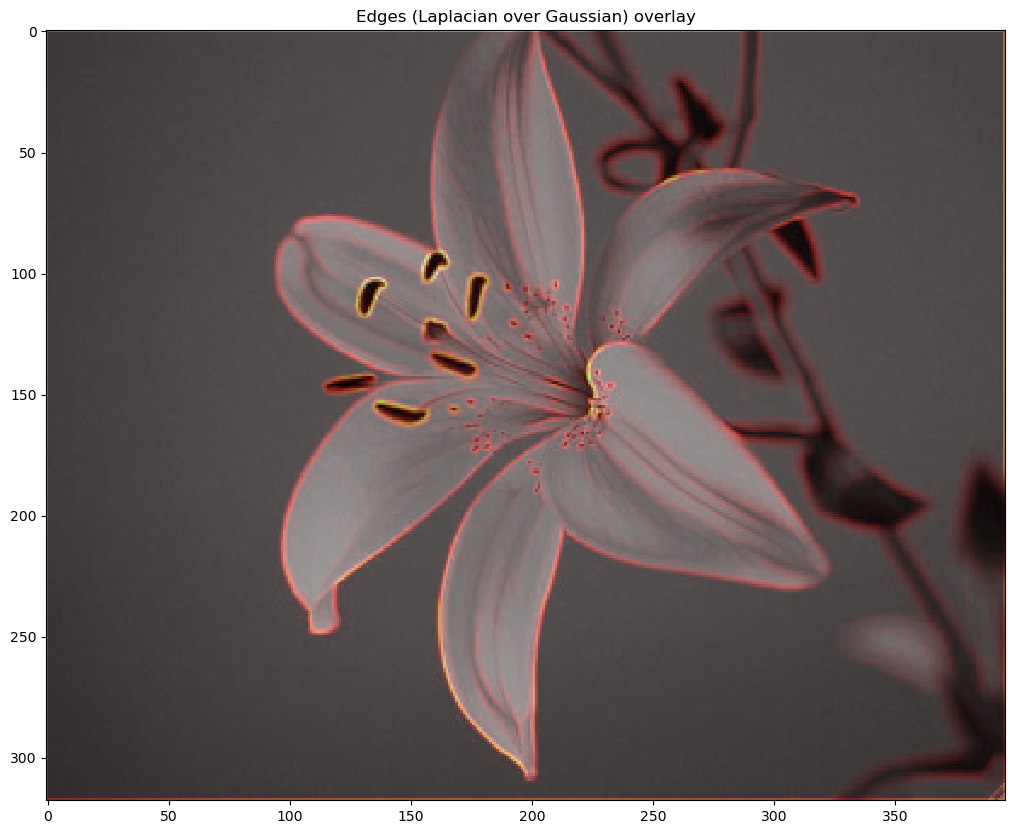

In [74]:
plt.title('Edges (Laplacian over Gaussian) overlay')

plt.imshow(gray_flower_img, cmap='gray', interpolation='none')

# Overlay the edges (adjust alpha for transparency)
plt.imshow(grad_module, cmap='hot', alpha=0.4, interpolation='none')

Text(0.5, 1.0, ' Orientations ')

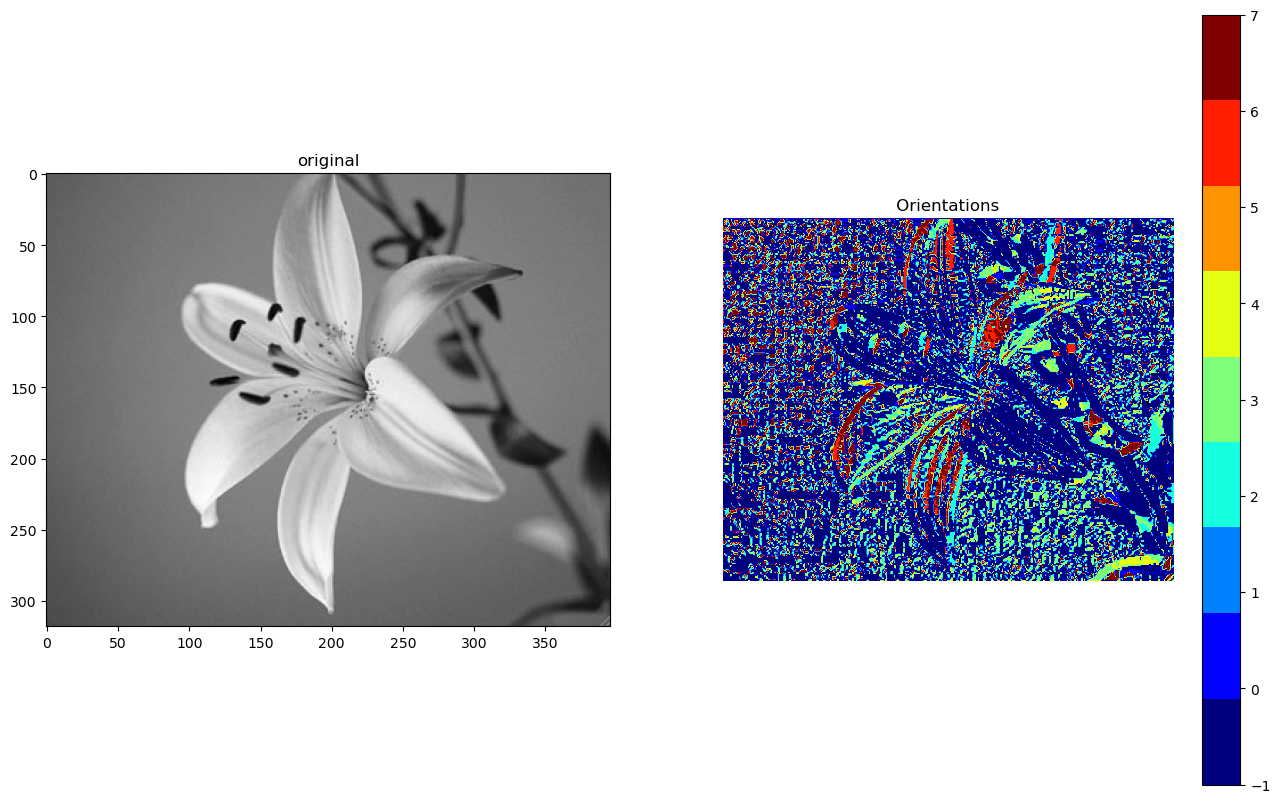

In [50]:
bins = 8
edges = grad_orientation(Gx, Gy, grad_direct, bins)

fig,ax = plt.subplots(1,2)

ax[0].imshow(gray_flower_img, cmap='gray')
ax[0].set_title("original")

cmap = cmap_discretize ('jet', bins+1)
ori_map = orientation_colors()
plt.imshow ( edges , cmap = cmap , vmin = -1 , vmax = bins -1)
plt.colorbar ()
plt.axis ('off')
plt.title (" Orientations ")

***EDGE DETECTION USING THE Laplacien Over Guassian***

**Edge detection** is a fundamental technique in image processing that aims to identify boundaries or transitions between different regions in an image. The Laplacian of Gaussian (LoG) filter is commonly used for edge detection. Let’s break down the steps to perform edge detection using the Laplacian over Gaussian approach:

**Gaussian Blurring:**
- Apply a Gaussian blur to the input image. This step helps reduce noise and smooths the image.
- The Gaussian filter is a weighted average of neighboring pixels, emphasizing central pixels.

**Laplacian Filter:**
- Compute the Laplacian of the blurred image. The Laplacian filter highlights rapid intensity changes (edges) in the image.
- The Laplacian operator is a second-order derivative that detects zero crossings (where the intensity changes from negative to positive or vice versa).

**Zero Crossing Detection:**
- Look for zero crossings in the Laplacian response.
- A zero crossing occurs when the Laplacian value changes sign (from negative to positive or vice versa).
- These zero crossings correspond to edges in the image.

**Thresholding (Optional):**
- Apply a threshold to the Laplacian response to obtain a binary edge map.
- Pixels with values above the threshold are considered edges, while others are suppressed.

**Visualize the Edges:**
Overlay the detected edges on the original image to visualize the results.

Text(0.5, 1.0, 'Edges (Laplacian over Gaussian)')

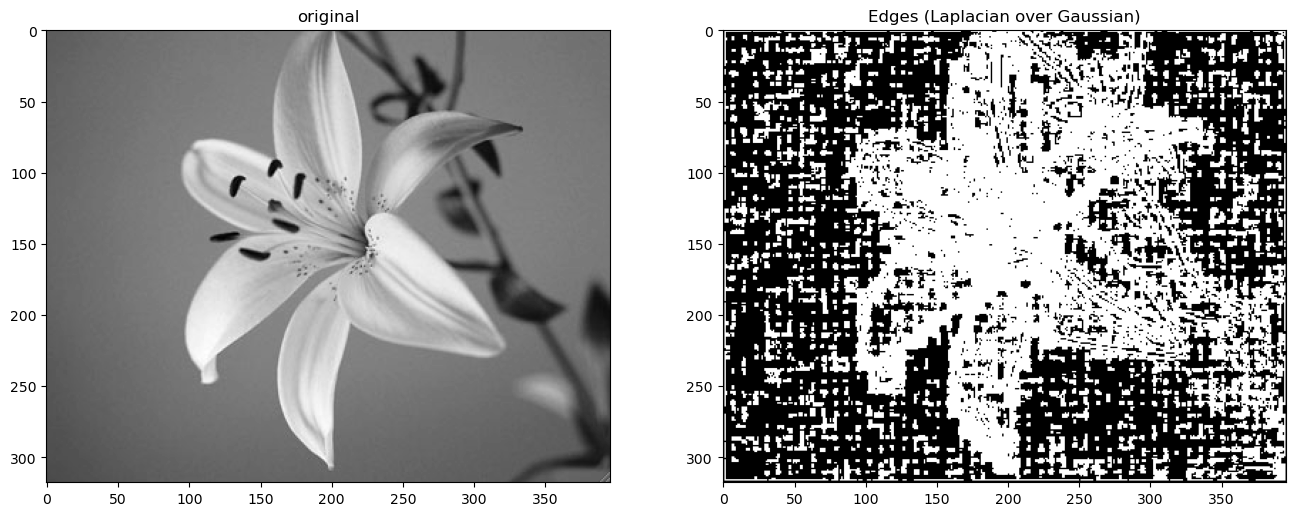

In [53]:
laplacian = get_L(gray_flower_img)

edges = detecter_contours(laplacian, 7)

fig,ax = plt.subplots(1,2)

#     ploting original img
ax[0].imshow(gray_flower_img, cmap='gray')
ax[0].set_title("original")

ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Edges (Laplacian over Gaussian)')

Text(0.5, 1.0, 'Edges (Laplacian over Gaussian)')

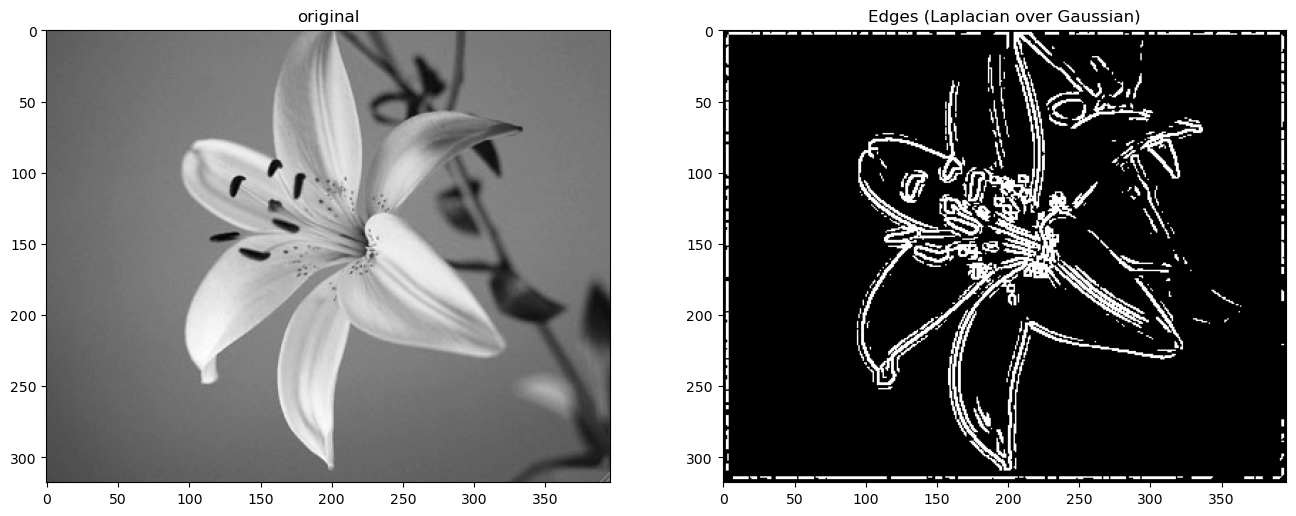

In [54]:
blurred_flower_img = apply_filter_to_single_channel(gray_flower_img, get_gaussian_filtre(5, 0.35))

laplacian = get_L(blurred_flower_img)

edges = detecter_contours(laplacian, 7)

fig,ax = plt.subplots(1,2)

#     ploting original img
ax[0].imshow(gray_flower_img, cmap='gray')
ax[0].set_title("original")

ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Edges (Laplacian over Gaussian)')

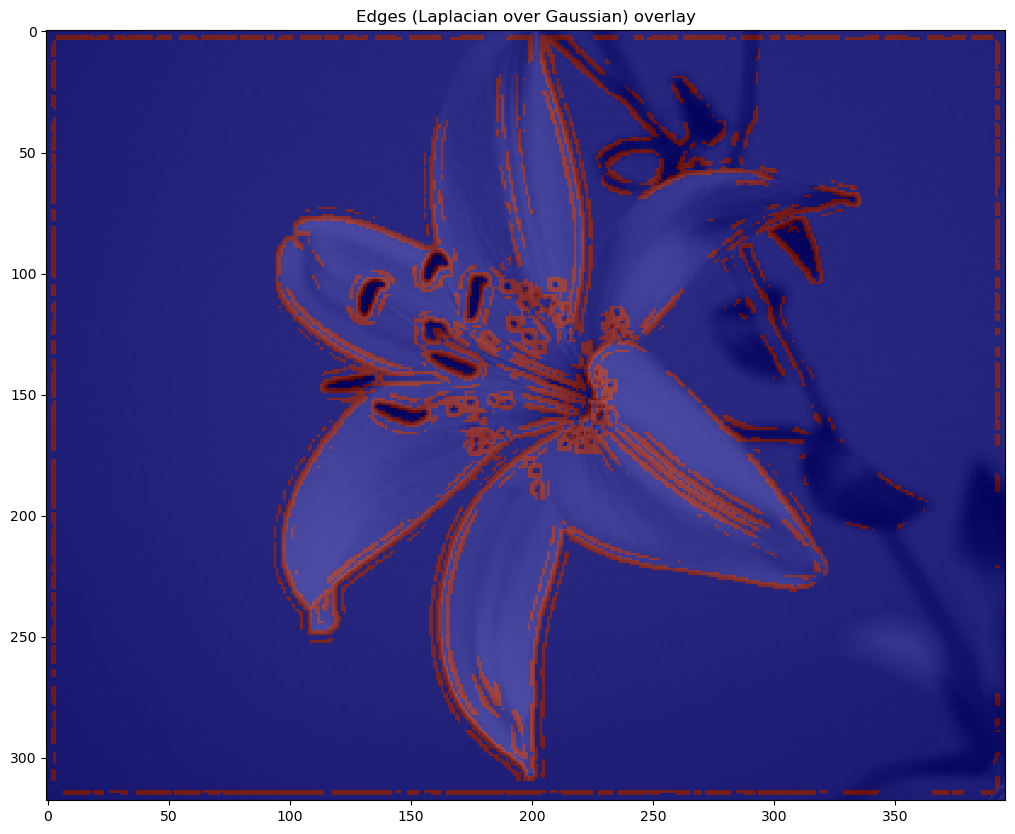

In [55]:
plt.title('Edges (Laplacian over Gaussian) overlay')

plt.imshow(gray_flower_img, cmap='gray', interpolation='none')

# Overlay the edges (adjust alpha for transparency)
plt.imshow(edges, cmap='jet', alpha=0.7, interpolation='none')

La détection des contours est une technique importante en traitement d'image et vision par ordinateur. Les opérateurs de Laplacien et de Sobel sont deux méthodes couramment utilisées pour la détection des contours. Voici quelques différences notables entre ces deux approches :

1. **Méthode de détection** : 
   - **Laplacien** : L'opérateur de Laplacien utilise une seconde dérivée pour la détection des contours. Il calcule la somme des secondes dérivées dans toutes les directions autour d'un pixel. Si cette somme est significative, le pixel est considéré comme un contour.
   - **Sobel** : L'opérateur de Sobel utilise une première dérivée pour la détection des contours. Il calcule la différence de l'intensité des pixels dans les directions horizontale et verticale.

2. **Sensibilité au bruit** :
   - **Laplacien** : Étant donné qu'il utilise une seconde dérivée, l'opérateur de Laplacien est plus sensible au bruit. Les images bruitées peuvent entraîner une détection de faux contours.
   - **Sobel** : L'opérateur de Sobel est moins sensible au bruit grâce à son utilisation d'une première dérivée.

3. **Direction des contours** :
   - **Laplacien** : L'opérateur de Laplacien ne prend pas en compte la direction des contours. Il détecte simplement la présence d'un contour.
   - **Sobel** : L'opérateur de Sobel peut détecter la direction des contours (horizontale, verticale ou diagonale) en plus de leur présence.

4. **Type de contours détectés** :
   - **Laplacien** : L'opérateur de Laplacien est efficace pour détecter les contours fins dans une image.
   - **Sobel** : L'opérateur de Sobel est plus efficace pour détecter les contours plus larges et plus prononcés.

Influence du lissage et suppression de non maxima

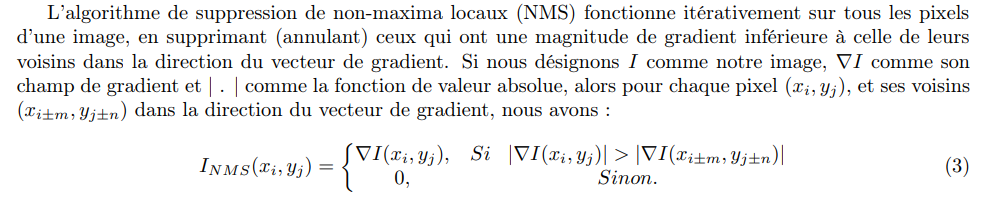

In [89]:
def non_maximum_suppression(gradient_module, gradient_orientation):
    import numpy as np
    
    gradient_orientation = np.degrees(gradient_orientation)
    
    region_1 = (0, 45)
    region_2 = (45, 90)
    region_3 = (90, 135)
    region_4 = (135, 180)
    
    inms = np.copy(gradient_module)
    
    for i in range(1, gradient_module.shape[0] - 1):
        for j in range(1, gradient_module.shape[1] - 1):
            orientation = gradient_orientation[i, j]
            
            x1, y1 = 0, 0
            x2, y2 = 0, 0
            
            if region_1[0] <= orientation < region_1[1] or region_4[0] <= orientation < region_4[1]:
                x1, y1 = i, j + 1
                x2, y2 = i, j - 1
            elif region_2[0] <= orientation < region_2[1]:
                x1, y1 = i - 1, j + 1
                x2, y2 = i + 1, j - 1
            elif region_3[0] <= orientation < region_3[1]:
                x1, y1 = i - 1, j
                x2, y2 = i + 1, j
            
            
            if gradient_module[i, j] < gradient_module[x1, y1] or gradient_module[i, j] < gradient_module[x2, y2]:
                inms[i, j] = 0
    
    return inms


Text(0.5, 1.0, 'Gaussian blurred image : ')

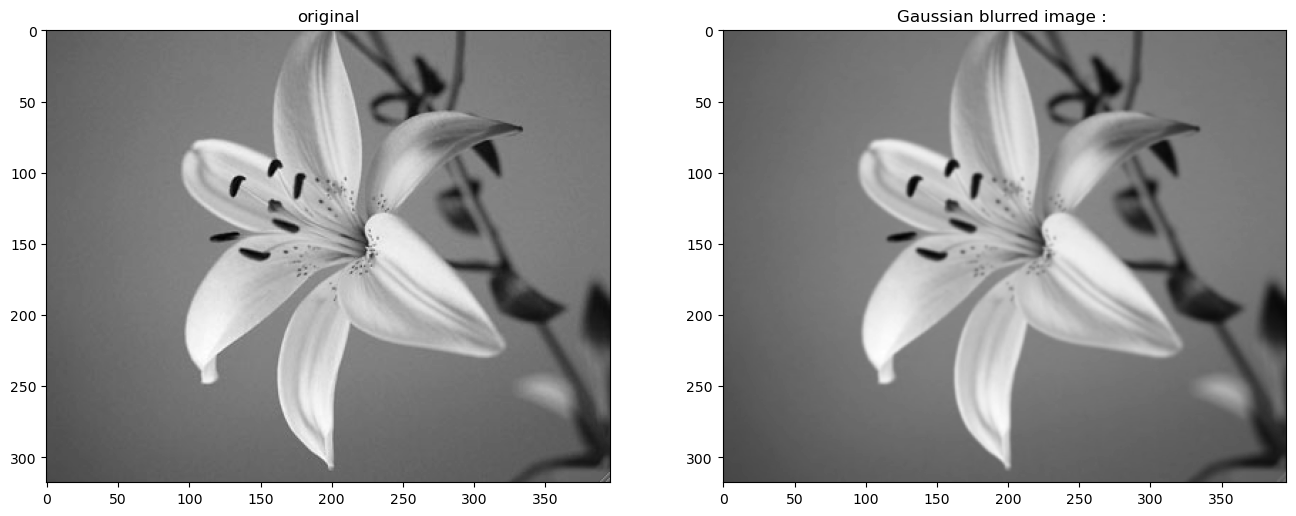

In [107]:
from scipy import ndimage
import matplotlib.pyplot as plt

blurred_img = ndimage.gaussian_filter( gray_flower_img, 0.8)

fig,ax = plt.subplots(1,2)

#     ploting original img
ax[0].imshow(gray_flower_img, cmap='gray')
ax[0].set_title("original")

ax[1].imshow(blurred_img, cmap='gray')
ax[1].set_title('Gaussian blurred image : ')

In [108]:
grad_module_blurred_flower = module_grad(blurred_img)
grad_direct_blurred_flower = direct_grad(blurred_img)

flower_inms = non_maximum_suppression(gradient_module=grad_module, gradient_orientation=grad_direct)

c:\Users\LEGION\Documents\IT\DataScience_Ai\notebooks\BTI\TP_02\my_functions_tp02.py:77: RuntimeWarning: divide by zero encountered in divide
  result=np.arctan(Gy/Gx)
c:\Users\LEGION\Documents\IT\DataScience_Ai\notebooks\BTI\TP_02\my_functions_tp02.py:77: RuntimeWarning: invalid value encountered in divide
  result=np.arctan(Gy/Gx)


Text(0.5, 1.0, 'Inms Image')

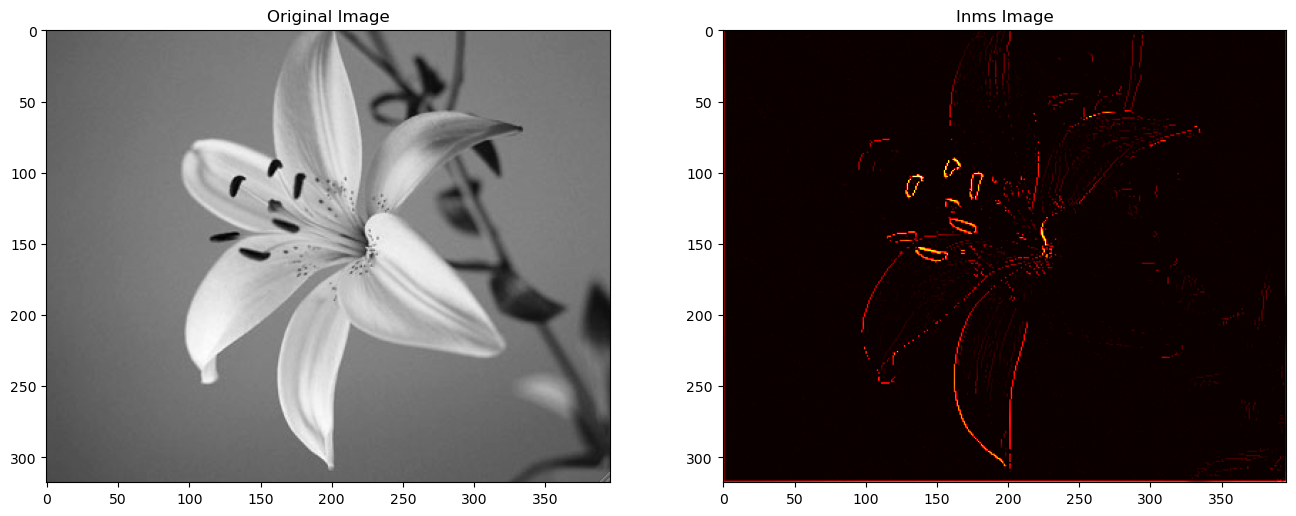

In [109]:
# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(gray_flower_img, cmap='gray')
plt.title('Original Image')

# Plot the inms image
plt.subplot(1, 2, 2)
plt.imshow(flower_inms, cmap='hot')
plt.title('Inms Image')

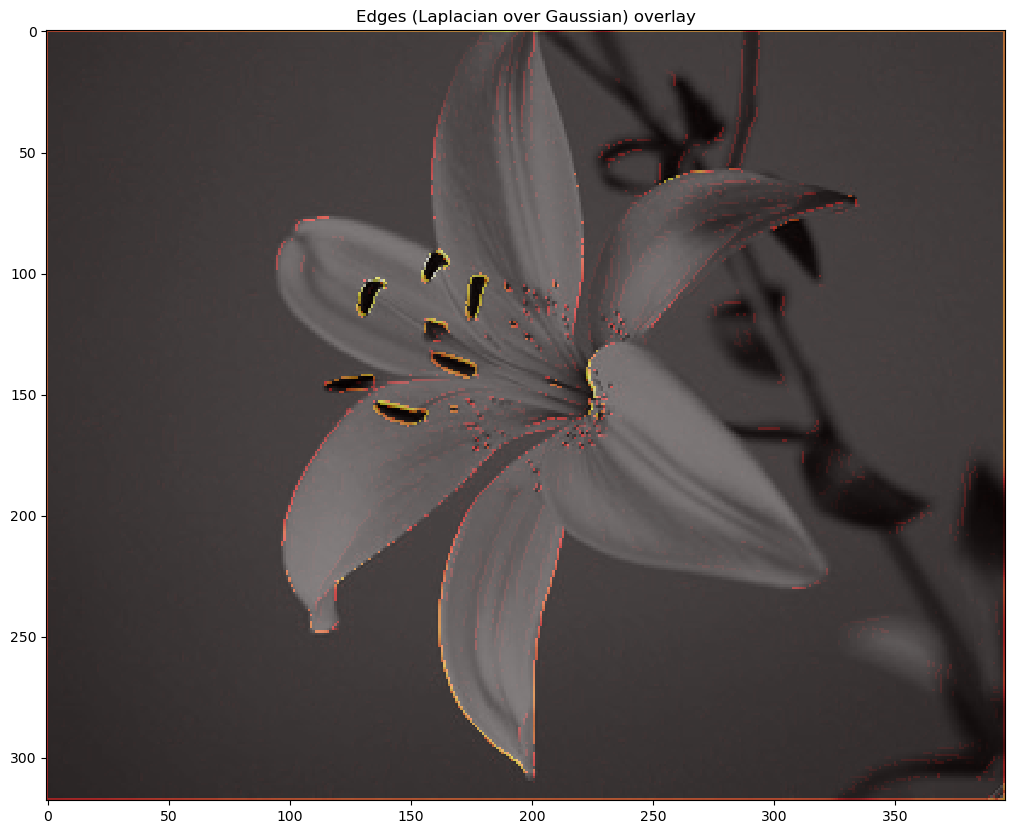

In [110]:
plt.title('Edges (Laplacian over Gaussian) overlay')

plt.imshow(gray_flower_img, cmap='gray', interpolation='none')

# Overlay the edges (adjust alpha for transparency)
plt.imshow(flower_inms, cmap='hot', alpha=0.5, interpolation='none')

Text(0.5, 1.0, 'Gaussian blurred image : ')

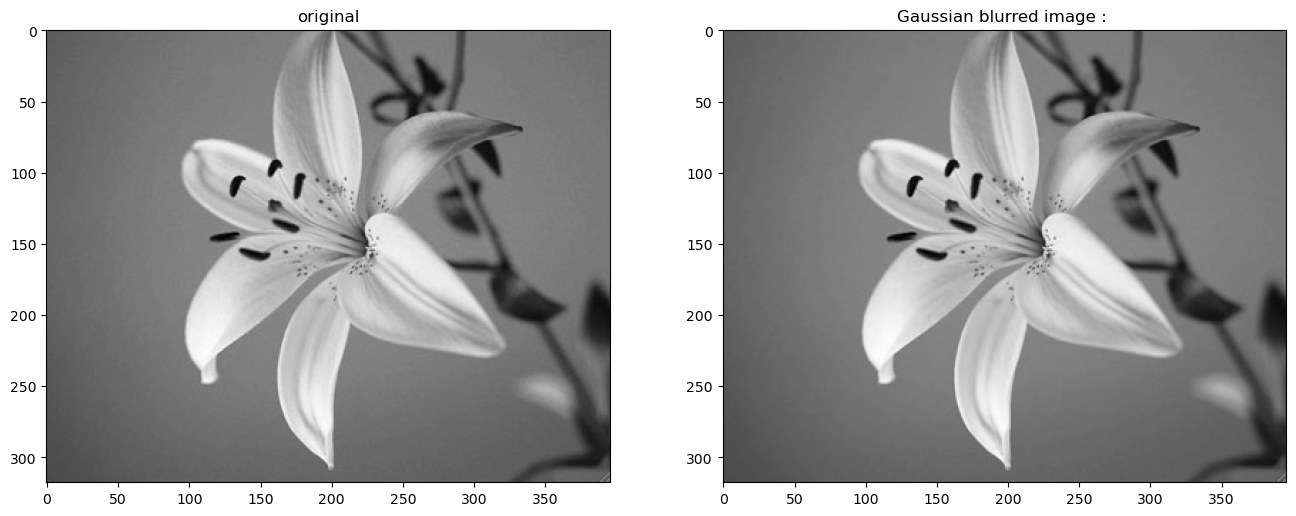

In [111]:
blurred_img = ndimage.gaussian_filter( gray_flower_img, 0.2)

fig,ax = plt.subplots(1,2)

#     ploting original img
ax[0].imshow(gray_flower_img, cmap='gray')
ax[0].set_title("original")

ax[1].imshow(blurred_img, cmap='gray')
ax[1].set_title('Gaussian blurred image : ')

In [112]:
grad_module_blurred_flower = module_grad(blurred_img)
grad_direct_blurred_flower = direct_grad(blurred_img)

flower_inms = non_maximum_suppression(gradient_module=grad_module, gradient_orientation=grad_direct)
flower_inms_smothed = ndimage.gaussian_filter( flower_inms, 0.2)

c:\Users\LEGION\Documents\IT\DataScience_Ai\notebooks\BTI\TP_02\my_functions_tp02.py:77: RuntimeWarning: divide by zero encountered in divide
  result=np.arctan(Gy/Gx)
c:\Users\LEGION\Documents\IT\DataScience_Ai\notebooks\BTI\TP_02\my_functions_tp02.py:77: RuntimeWarning: invalid value encountered in divide
  result=np.arctan(Gy/Gx)


Text(0.5, 1.0, 'Inms Image')

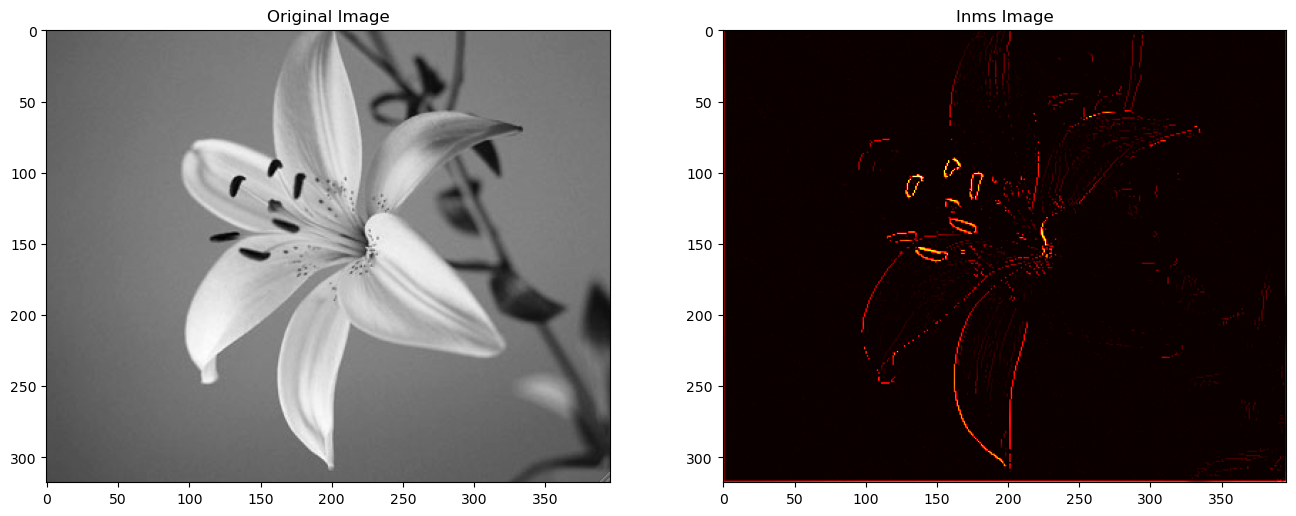

In [113]:
# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(gray_flower_img, cmap='gray')
plt.title('Original Image')

# Plot the inms image
plt.subplot(1, 2, 2)
plt.imshow(flower_inms, cmap='hot')
plt.title('Inms Image')

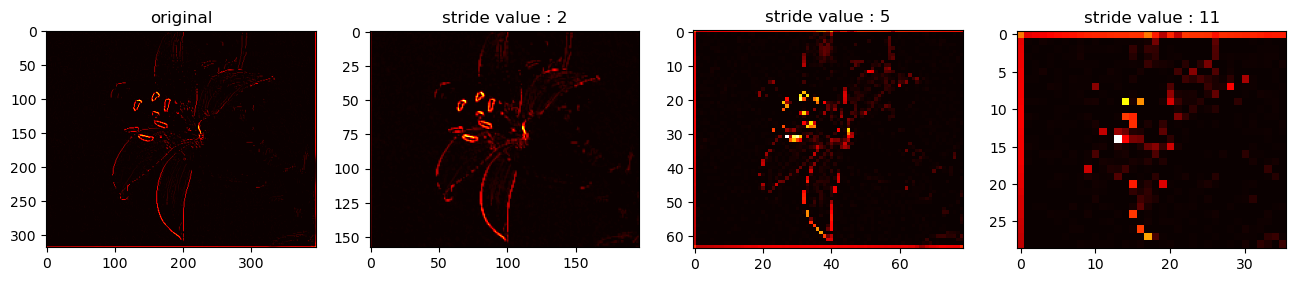

In [123]:
strides = [ 2, 5, 11]

fig,ax = plt.subplots(1,4)
#     ploting original img
ax[0].imshow(flower_inms, cmap='hot')
ax[0].set_title("original")

i = 1
for stride in strides : 
    filtered_with_stride_img = tools.Conv2D(flower_inms, mean_kernel3x3, padding=(0,0) , stride=(stride,stride))
    
    #     ploting filtred img
    ax[i].imshow(filtered_with_stride_img, cmap='hot')
    ax[i].set_title('stride value : '+ str(stride))
    i = i + 1

In [ ]:
grad_module_blurred_flower = module_grad(blurred_img)
grad_direct_blurred_flower = direct_grad(blurred_img)

flower_inms = non_maximum_suppression(gradient_module=grad_module, gradient_orientation=grad_direct)

c:\Users\LEGION\Documents\IT\DataScience_Ai\notebooks\BTI\TP_02\my_functions_tp02.py:77: RuntimeWarning: divide by zero encountered in divide
  result=np.arctan(Gy/Gx)
c:\Users\LEGION\Documents\IT\DataScience_Ai\notebooks\BTI\TP_02\my_functions_tp02.py:77: RuntimeWarning: invalid value encountered in divide
  result=np.arctan(Gy/Gx)


Text(0.5, 1.0, 'Inms Image')

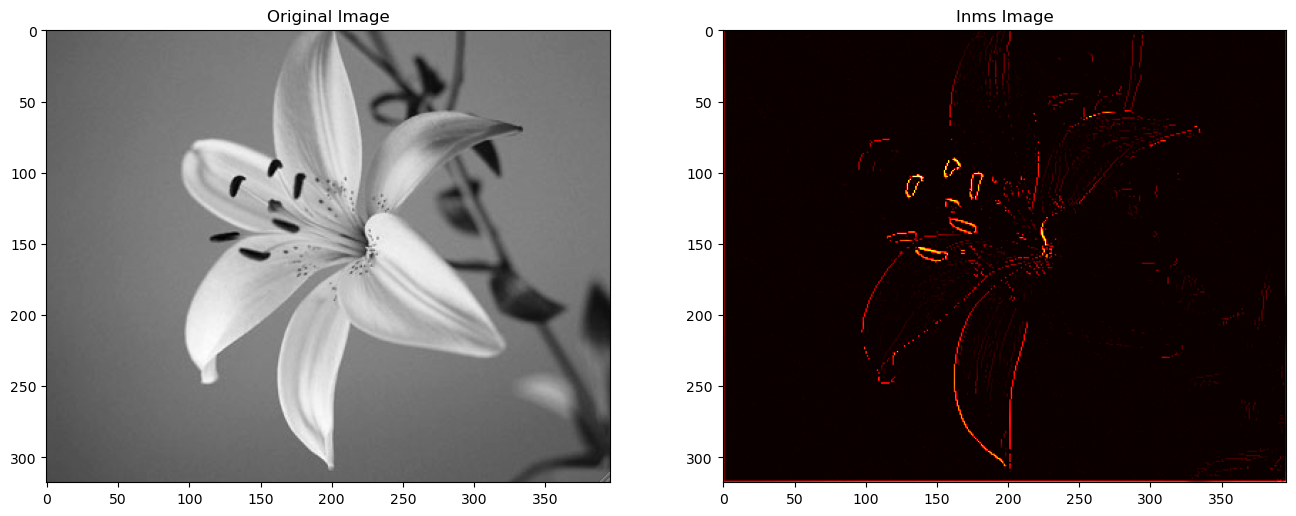

In [ ]:
# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(gray_flower_img, cmap='gray')
plt.title('Original Image')

# Plot the inms image
plt.subplot(1, 2, 2)
plt.imshow(flower_inms, cmap='hot')
plt.title('Inms Image')

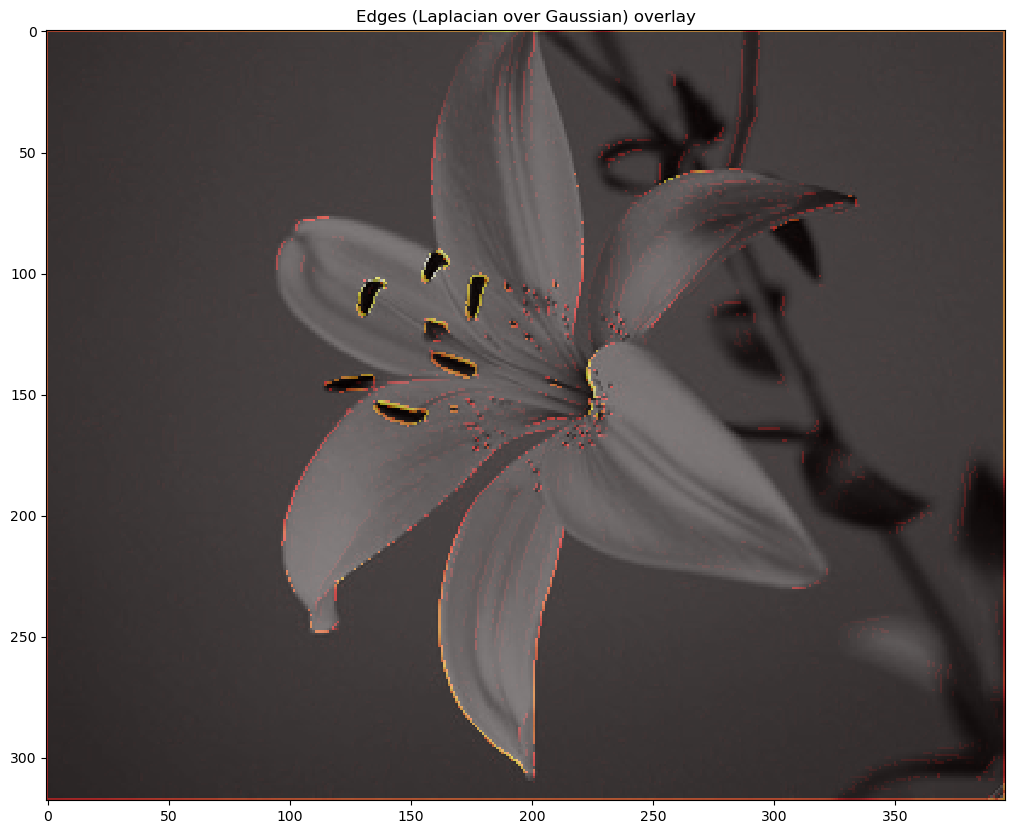

In [ ]:
plt.title('Edges (Laplacian over Gaussian) overlay')

plt.imshow(gray_flower_img, cmap='gray', interpolation='none')

# Overlay the edges (adjust alpha for transparency)
plt.imshow(flower_inms, cmap='hot', alpha=0.5, interpolation='none')

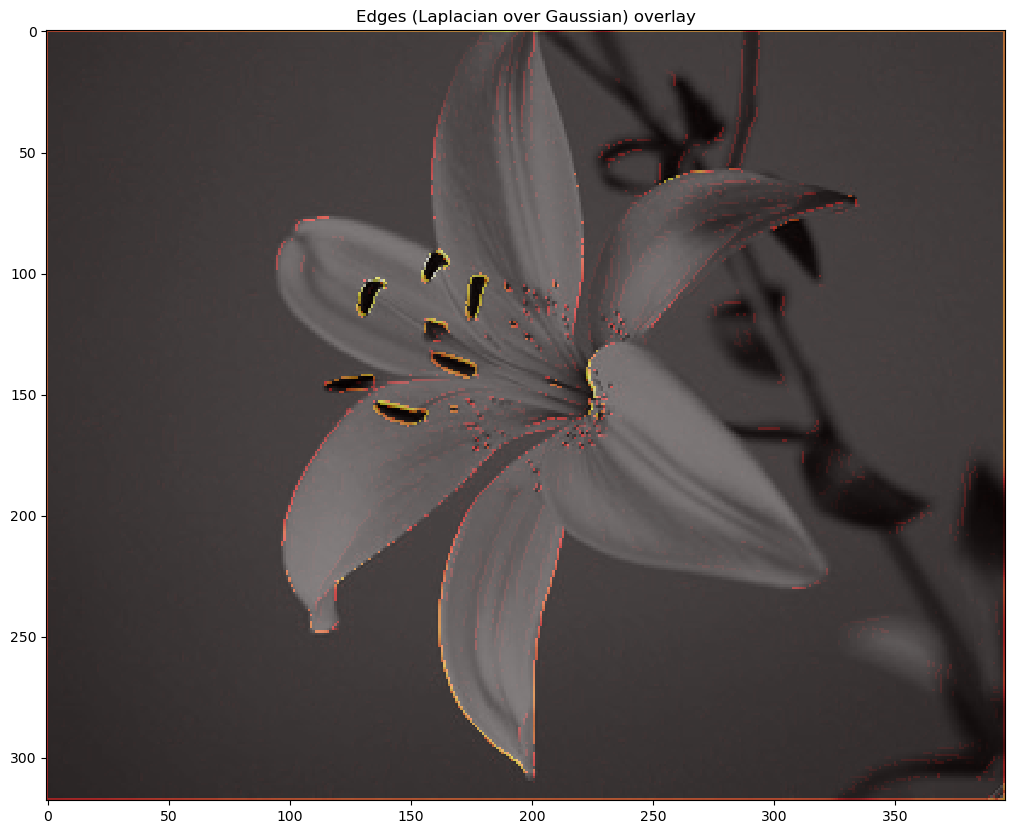

In [114]:
plt.title('Edges (Laplacian over Gaussian) overlay')

plt.imshow(gray_flower_img, cmap='gray', interpolation='none')

# Overlay the edges (adjust alpha for transparency)
plt.imshow(flower_inms, cmap='hot', alpha=0.5, interpolation='none')

Les différentes approches de détection de contours, telles que Sobel, Laplacian et Canny (inms), sont des techniques couramment utilisées en traitement d'image pour extraire les contours des objets présents dans une image.

La méthode de Sobel utilise des opérateurs de convolution pour calculer les gradients de l'image dans les directions horizontale et verticale. Ces gradients sont ensuite combinés pour obtenir une estimation de la magnitude du gradient et de l'orientation du contour. Cette méthode est simple et efficace pour détecter les contours, mais elle peut être sensible au bruit dans l'image.

Le Laplacian est un autre opérateur de convolution qui calcule la seconde dérivée de l'image. Il est utilisé pour détecter les changements brusques d'intensité dans l'image, ce qui correspond généralement aux contours. Cependant, le Laplacian peut également être sensible au bruit et peut produire des contours discontinus.

La méthode de Canny, également connue sous le nom de méthode de détection de contours par seuillage double, combine les avantages des méthodes de Sobel et de Laplacian. Elle utilise un algorithme en plusieurs étapes pour détecter les contours de manière plus robuste. Canny utilise d'abord la méthode de Sobel pour calculer les gradients de l'image, puis applique une suppression des non-maximaux pour affiner les contours. Enfin, un seuillage adaptatif est utilisé pour supprimer les contours faibles et ne conserver que les contours forts.

En ce qui concerne le lissage, il est souvent utilisé avant d'appliquer les opérateurs de détection de contours pour réduire le bruit dans l'image. Le paramètre sigma est utilisé pour contrôler l'intensité du lissage. Une valeur plus élevée de sigma entraîne un lissage plus important, ce qui peut réduire le bruit mais aussi atténuer les contours. Il est important de trouver un équilibre entre le lissage et la préservation des contours pour obtenir les meilleurs résultats.

En conclusion, les différentes approches de détection de contours ont leurs avantages et leurs limites. La méthode de Sobel est simple et efficace, mais peut être sensible au bruit. Le Laplacian est utile pour détecter les changements brusques d'intensité, mais peut produire des contours discontinus. La méthode de Canny combine les avantages des deux méthodes précédentes et est souvent considérée comme la plus robuste. Le lissage, contrôlé par le paramètre sigma, est important pour réduire le bruit, mais il faut trouver un équilibre pour préserver les contours. Il est recommandé d'expérimenter avec différents paramètres et techniques pour trouver la meilleure approche de détection de contours pour une application spécifique.